In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import math
import scipy.stats as stats
import statsmodels.stats.multitest

In [2]:
normalized_bulk_seq = pd.read_csv('/data/passala/Collaborator_Data/Penelope_Dave_Collab/Removed_low_correlation_data/NAM_RNAseq_normalizedNov22.csv', index_col= 0)
#normalized_bulk_seq = normalized_bulk_seq.drop(columns = ['CML333_1091/1092_1','CML333_1091/1092_2'])
bulk_seq_summary = pd.read_csv('/home/passala/passala/Collaborator_Data/Penelope_Dave_Collab/June_2022_DATA/NAM_RNAseq_metadata_no_outliers.csv',index_col= 0)

In [3]:
bulk_seq_summary = bulk_seq_summary.drop_duplicates(subset= ['condition'], keep= 'first')
bulk_seq_summary.at['fea3.2_1b','condition'] = 'fea3.2'

In [4]:
bulk_seq_summary = bulk_seq_summary.drop(['fea3.2_1b','NC350_1','CML69_1b','Ki11_1b','CML322_1b','M162W_1b','Ky21_2b'])


In [5]:
NAM_line_list = bulk_seq_summary['condition'].to_list()
NAM_list_of_avg_meristem_sizes = bulk_seq_summary['size']
NAM_list_of_avg_meristem_sizes.index = NAM_line_list

In [6]:
bulk_seq_summary

,condition,size,size_bin,batch
sampName,,,,
B73_1b,B73,454.888985,c,2
B104_1,B104,351.818059,b,1
CML103_1b,CML103,371.815220,b,2
CML228_1b,CML228,379.897533,b,2
CML277_1,CML277,335.326761,b,1
CML333_1b,CML333,272.621221,a,2
CML52_1b,CML52,252.947305,a,2
Hp301_1b,Hp301,361.244958,b,2
Il14H_1b,Il14H,376.638873,b,2


In [7]:
NAM_list_of_avg_meristem_sizes

B73       454.888985
B104      351.818059
CML103    371.815220
CML228    379.897533
CML277    335.326761
CML333    272.621221
CML52     252.947305
Hp301     361.244958
Il14H     376.638873
Ki3       378.559959
Mo17      276.613015
Mo18W     413.673750
Ms71      340.853601
NC358     400.000000
Oh7B      340.373941
P39       362.774076
Tx303     318.139920
Oh43      341.000000
Tzi8      406.175635
Name: size, dtype: float64

In [8]:
NAM_line_list

['B73',
 'B104',
 'CML103',
 'CML228',
 'CML277',
 'CML333',
 'CML52',
 'Hp301',
 'Il14H',
 'Ki3',
 'Mo17',
 'Mo18W',
 'Ms71',
 'NC358',
 'Oh7B',
 'P39',
 'Tx303',
 'Oh43',
 'Tzi8']

In [9]:
normalized_mean_values_of_each_landrace = pd.DataFrame(index= normalized_bulk_seq.index)
for landrace in NAM_line_list:
    normalized_mean_values_of_each_landrace[landrace] = normalized_bulk_seq.filter(like = landrace,axis = 1).mean(axis = 1).values

In [10]:
normalized_mean_values_of_each_landrace

,B73,B104,CML103,CML228,CML277,CML333,CML52,Hp301,Il14H,Ki3,Mo17,Mo18W,Ms71,NC358,Oh7B,P39,Tx303,Oh43,Tzi8
GRMZM2G059865,143.144668,31.036777,91.639810,90.869831,148.571780,252.519616,231.787049,120.487991,223.190521,143.067901,34.832808,78.768565,176.169776,134.444064,80.364281,133.200355,122.903221,116.451243,179.361113
GRMZM2G093344,1.080938,1.095471,1.153207,1.078710,0.709291,0.549944,0.328379,0.509219,2.445423,0.236065,1.822133,1.185299,0.000000,0.000000,0.571473,0.566552,0.290631,0.380304,0.000000
GRMZM2G093399,0.240740,0.000000,3.238375,4.189058,7.903092,0.000000,2.392175,9.695504,0.000000,0.236065,0.000000,0.175148,9.178438,7.176268,7.080156,0.000000,7.323361,0.000000,5.860925
GRMZM5G809743,0.000000,0.000000,0.000000,0.000000,0.377239,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GRMZM5G833153,0.135217,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RPS3.1,8.818898,9.250963,9.118402,7.295628,8.577716,11.127886,7.388652,6.559579,8.979680,12.303565,13.679365,8.554387,9.106171,7.682200,5.611771,9.321064,11.216721,11.276549,6.501922
NDHD,0.951029,0.938254,0.408985,0.856365,0.714551,0.000000,0.769755,0.418627,1.300099,0.708195,1.399477,0.117788,0.609322,0.000000,0.488293,1.736260,3.467468,0.792852,2.011632
PSAC,0.000000,0.000000,0.000000,0.154865,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.515430,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AC191109.3_FG001,0.237184,0.000000,0.000000,0.280608,0.337312,0.000000,0.212427,0.000000,0.000000,0.316319,0.000000,0.087574,0.609322,0.000000,0.000000,1.699656,0.000000,0.000000,0.000000


In [11]:
#normalized_mean_values_of_each_landrace = normalized_mean_values_of_each_landrace.drop(columns = ['fea3.2','NC350','CML69','Ki11','CML322','M162W','Ky21'])

In [12]:
expressed_in_any_lowest_scrutiny = normalized_mean_values_of_each_landrace.loc[(normalized_mean_values_of_each_landrace>0).sum(axis =1)> 0]
expressed_in_any_lowest_scrutiny

,B73,B104,CML103,CML228,CML277,CML333,CML52,Hp301,Il14H,Ki3,Mo17,Mo18W,Ms71,NC358,Oh7B,P39,Tx303,Oh43,Tzi8
GRMZM2G059865,143.144668,31.036777,91.639810,90.869831,148.571780,252.519616,231.787049,120.487991,223.190521,143.067901,34.832808,78.768565,176.169776,134.444064,80.364281,133.200355,122.903221,116.451243,179.361113
GRMZM2G093344,1.080938,1.095471,1.153207,1.078710,0.709291,0.549944,0.328379,0.509219,2.445423,0.236065,1.822133,1.185299,0.000000,0.000000,0.571473,0.566552,0.290631,0.380304,0.000000
GRMZM2G093399,0.240740,0.000000,3.238375,4.189058,7.903092,0.000000,2.392175,9.695504,0.000000,0.236065,0.000000,0.175148,9.178438,7.176268,7.080156,0.000000,7.323361,0.000000,5.860925
GRMZM5G809743,0.000000,0.000000,0.000000,0.000000,0.377239,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GRMZM5G833153,0.135217,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RPS3.1,8.818898,9.250963,9.118402,7.295628,8.577716,11.127886,7.388652,6.559579,8.979680,12.303565,13.679365,8.554387,9.106171,7.682200,5.611771,9.321064,11.216721,11.276549,6.501922
NDHD,0.951029,0.938254,0.408985,0.856365,0.714551,0.000000,0.769755,0.418627,1.300099,0.708195,1.399477,0.117788,0.609322,0.000000,0.488293,1.736260,3.467468,0.792852,2.011632
PSAC,0.000000,0.000000,0.000000,0.154865,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.515430,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AC191109.3_FG001,0.237184,0.000000,0.000000,0.280608,0.337312,0.000000,0.212427,0.000000,0.000000,0.316319,0.000000,0.087574,0.609322,0.000000,0.000000,1.699656,0.000000,0.000000,0.000000


In [13]:
pearson_correlation_with_meristem_size = normalized_mean_values_of_each_landrace.corrwith(other = NAM_list_of_avg_meristem_sizes,axis = 1,method = 'pearson')
pearson_correlation_with_meristem_size = pd.DataFrame(pearson_correlation_with_meristem_size,columns = ['Pearson Correlation with Meristem Width'])
pearson_correlation_with_meristem_size.sort_values(by = 'Pearson Correlation with Meristem Width', ascending = False )

,Pearson Correlation with Meristem Width
GRMZM2G168479,0.762935
GRMZM2G028286,0.762536
GRMZM2G025157,0.731940
GRMZM2G142898,0.730961
GRMZM2G394321,0.707053
...,...
GRMZM2G451771,NaN
GRMZM2G077951,NaN
GRMZM5G880410,NaN
GRMZM2G453963,NaN


In [14]:
pearson_correlation_with_meristem_size['Pearson Correlation with Meristem Width'].dropna()

GRMZM2G059865      -0.196058
GRMZM2G093344       0.057649
GRMZM2G093399       0.003567
GRMZM5G809743      -0.092015
GRMZM5G833153       0.481995
                      ...   
RPS3.1             -0.337921
NDHD               -0.076968
PSAC               -0.328047
AC191109.3_FG001    0.058805
GRMZM2G372364       0.297468
Name: Pearson Correlation with Meristem Width, Length: 27599, dtype: float64

In [15]:
#pearson_correlation_with_meristem_size = pearson_correlation_with_meristem_size.dropna()

In [16]:
pearson_correlation_with_meristem_size.sort_values(by = 'Pearson Correlation with Meristem Width')

,Pearson Correlation with Meristem Width
GRMZM2G123585,-0.794267
GRMZM2G113401,-0.774735
GRMZM2G171223,-0.711904
GRMZM2G319189,-0.688409
GRMZM2G148460,-0.677432
...,...
GRMZM2G451771,NaN
GRMZM2G077951,NaN
GRMZM5G880410,NaN
GRMZM2G453963,NaN


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

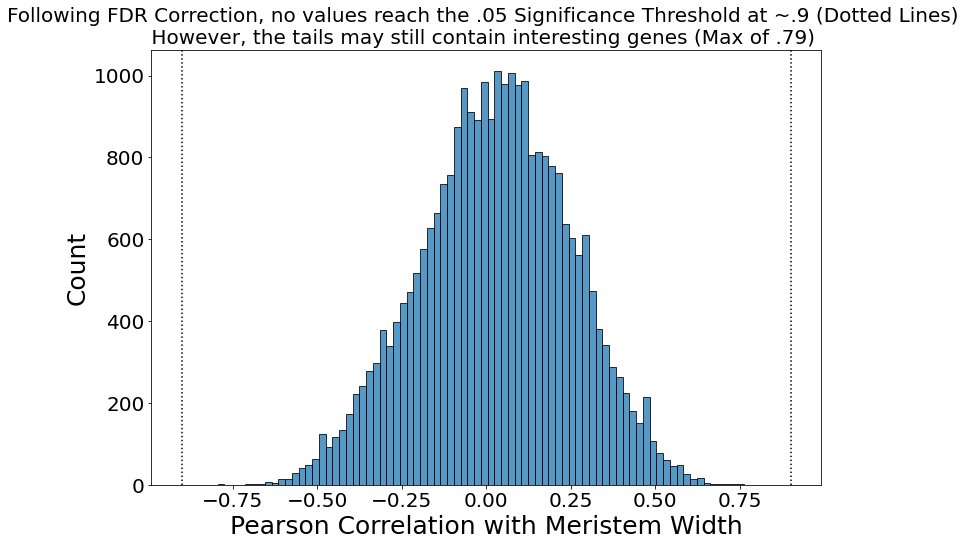

In [17]:
fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(data = pearson_correlation_with_meristem_size, x = 'Pearson Correlation with Meristem Width')
plt.axvline(x = .9, linestyle= ':', color = 'k')
plt.axvline(x = -.9, linestyle= ':', color = 'k')
plt.ylabel("Count", fontsize=25)
plt.xlabel("Pearson Correlation with Meristem Width", fontsize=25)
plt.title(
    "Following FDR Correction, no values reach the .05 Significance Threshold at ~.9 (Dotted Lines) \n However, the tails may still contain interesting genes (Max of .79)  ",
    fontsize=20,
)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [18]:

## Change Pearson vs Spearman Here
corr_and_p_value_list = []
for land_race_gene in normalized_mean_values_of_each_landrace.iterrows():
    current_correlation, current_pvalue = stats.spearmanr(land_race_gene[1],NAM_list_of_avg_meristem_sizes)
    current_values_to_append = [current_correlation,current_pvalue]
    corr_and_p_value_list.append(current_values_to_append)

/home/passala/miniconda3/envs/Single_cell_data_fix/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [19]:
stats_and_pearson_calculated = pd.DataFrame(index = pearson_correlation_with_meristem_size.index, data = corr_and_p_value_list, columns = ['Pearson Correlation with Meristem Width','P Value'])
stats_and_pearson_calculated = stats_and_pearson_calculated.dropna()

In [20]:
reject, corrected = statsmodels.stats.multitest.fdrcorrection(stats_and_pearson_calculated['P Value'])

In [21]:
stats_and_pearson_calculated['Corrected P Value'] = corrected

In [22]:
stats_and_pearson_calculated.sort_values(by = 'P Value', ascending= True).head(10)

,Pearson Correlation with Meristem Width,P Value,Corrected P Value
GRMZM2G168479,0.791228,0.000055,0.998473
AC207043.3_FG002,0.778266,0.000087,0.998473
GRMZM2G328171,0.768373,0.000122,0.998473
GRMZM2G142898,0.752008,0.000204,0.998473
GRMZM2G123585,-0.743860,0.000261,0.998473
GRMZM2G071339,0.733333,0.000353,0.998473
GRMZM2G009320,0.731865,0.000368,0.998473
GRMZM2G097207,0.731579,0.000371,0.998473
GRMZM2G170561,0.731485,0.000372,0.998473
GRMZM2G438301,0.726485,0.000427,0.998473


In [23]:
#stats_and_pearson_calculated.to_csv('/data/passala/Generated_Tables/Penelope_data/outliers_removed_all_gene_Pearson_correlation_with_meristem.csv')

<AxesSubplot:xlabel='P Value', ylabel='Count'>

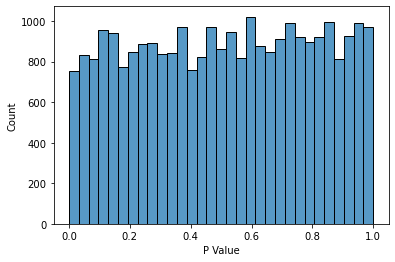

In [24]:
sns.histplot(data = stats_and_pearson_calculated, x = 'P Value')

In [25]:
# fig, ax = plt.subplots(figsize=(12,8))
# sns.histplot(data = krn_stats_and_pearson, x = 'Pearson Correlation with KRN')
# plt.axvline(x = .9, linestyle= ':', color = 'k')
# plt.axvline(x = -.9, linestyle= ':', color = 'k')
# plt.ylabel("Count", fontsize=25)
# plt.xlabel("Pearson Correlation with Kernel Row Number", fontsize=25)
# plt.title(
#     "The same is true for for Correlation with KRN, although the highest P values are slightly higher (max of .87)  ",
#     fontsize=20,
# )
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)

In [26]:
def get_go_annotations_as_panda(species):
    import pandas as pd
    ## TAXA_ID to species_name
    if type(species) == int:
        mapper = pd.read_csv(
            '/home/passala/Gene_duplication_project/Generated_tables/Time_Savers/Species_name_resolver.csv'
        )
        species = mapper['Common Name'].loc[mapper['Taxa ID'] == species].item()

    ## Get file_location
    file_location = '/data/CoCoCoNet/gene2go/' + species + '_gene2go.csv'
    original_csv = pd.read_csv(file_location, sep=' ')
    if len(original_csv) == 0:
        raise NameError('No Annotations for this Species :(')
    original_csv = original_csv.dropna()
    original_csv['Present'] = 1
    matrixed_version = original_csv.pivot(index='NetworkIDs',
                                          columns='GO_term',
                                          values='Present')
    filled_matrixed_version = matrixed_version.fillna(value=0)
    return filled_matrixed_version

In [27]:
def generate_contigency_tables(go_annotations,gene_list,use_limited_background = False,background_list_of_genes = []):

    if use_limited_background == True:
        if len(background_list_of_genes) > 0:
            pass
            #go_annotations = go_annotations.loc[]
    gene_list = list(set(go_annotations.index) & set(gene_list))
    background_distribution_num_genes_annotated_with_go_term = go_annotations.sum(axis =0)
    background_dipstribution_num_genes_that_lack_go_term = go_annotations.shape[0]-background_distribution_num_genes_annotated_with_go_term
    annotation_subset_to_genes_in_list = go_annotations.loc[gene_list]
    go_subset_distribution_num_genes_annotatated_with_go_term = annotation_subset_to_genes_in_list.sum(axis =0)
    go_subset_distribution_num_genes_that_lack_go_term = annotation_subset_to_genes_in_list.shape[0] - go_subset_distribution_num_genes_annotatated_with_go_term
    
    all_go_contingency_tables = []
    i = 0
    for term_of_go in background_distribution_num_genes_annotated_with_go_term:
        contig_table = [[(term_of_go - go_subset_distribution_num_genes_annotatated_with_go_term[i]),go_subset_distribution_num_genes_annotatated_with_go_term[i]],[(background_dipstribution_num_genes_that_lack_go_term[i]-go_subset_distribution_num_genes_that_lack_go_term[i]),go_subset_distribution_num_genes_that_lack_go_term[i]]]
        all_go_contingency_tables.append(contig_table)
        i +=1
    return all_go_contingency_tables

In [28]:
## Penelope both sides otherwise comment out

#stats_and_pearson_calculated['Pearson Correlation with Meristem Width'] = abs(stats_and_pearson_calculated['Pearson Correlation with Meristem Width'])
#stats_and_pearson_calculated.sort_values(by = 'Pearson Correlation with Meristem Width',ascending = False)[:3000]

#krn_stats_and_pearson['Pearson Correlation with KRN'] = abs(krn_stats_and_pearson['Pearson Correlation with KRN'])

In [29]:
stats_and_pearson_calculated.sort_values(by = 'Pearson Correlation with Meristem Width',ascending = False)[:1200]

,Pearson Correlation with Meristem Width,P Value,Corrected P Value
GRMZM2G168479,0.791228,0.000055,0.998473
AC207043.3_FG002,0.778266,0.000087,0.998473
GRMZM2G328171,0.768373,0.000122,0.998473
GRMZM2G142898,0.752008,0.000204,0.998473
GRMZM2G071339,0.733333,0.000353,0.998473
...,...,...,...
GRMZM5G854604,0.425736,0.069162,0.998473
GRMZM2G441029,0.425665,0.069213,0.998473
GRMZM5G818655,0.425510,0.069325,0.998473
GRMZM2G159768,0.425510,0.069325,0.998473


In [71]:
stats_and_pearson_calculated.to_csv('/data/passala/Collaborator_Data/Penelope_Dave_Collab/Removed_low_correlation_data/spearman_correlation_without_outliers_or_files.csv')

In [50]:
# normal, then abs, then neg
list_of_high_genes = stats_and_pearson_calculated.sort_values(by = 'Pearson Correlation with Meristem Width',ascending = False)[:693].index.to_list()
## normal permissive 
#list_of_high_genes = stats_and_pearson_calculated.sort_values(by = 'Pearson Correlation with Meristem Width',ascending = False)[:1200].index.to_list()
##abs, neg
##list_of_high_genes =  stats_and_pearson_calculated.sort_values(by = 'P Value',ascending = True)[:600].index.to_list()
#list_of_high_genes = stats_and_pearson_calculated.sort_values(by = 'Pearson Correlation with Meristem Width',ascending = False)[-600:].index.to_list()


#KRN Association
#list_of_high_genes = krn_stats_and_pearson.sort_values(by = 'Pearson Correlation with KRN',ascending = False)[:2000].index.to_list()
#list_of_high_genes = krn_stats_and_pearson.sort_values(by = 'Pearson Correlation with KRN',ascending = False)[-1500:].index.to_list()

In [51]:
stats_and_pearson_calculated.sort_values(by = 'Pearson Correlation with Meristem Width',ascending = False)[-1750:]

,Pearson Correlation with Meristem Width,P Value,Corrected P Value
GRMZM2G091433,-0.310526,0.195689,0.998473
GRMZM2G125452,-0.310526,0.195689,0.998473
GRMZM2G173684,-0.310526,0.195689,0.998473
GRMZM2G048644,-0.310526,0.195689,0.998473
GRMZM2G159399,-0.310526,0.195689,0.998473
...,...,...,...
GRMZM2G505732,-0.693209,0.000999,0.998473
GRMZM2G318475,-0.696491,0.000923,0.998473
GRMZM2G319189,-0.704792,0.000753,0.998473
GRMZM5G831780,-0.707018,0.000712,0.998473


In [52]:
maize_go = get_go_annotations_as_panda('maize')
maize_go

GO_term,GO:0000002,GO:0000003,GO:0000009,GO:0000012,GO:0000014,GO:0000015,GO:0000018,GO:0000019,GO:0000023,GO:0000025,...,GO:2001239,GO:2001240,GO:2001242,GO:2001243,GO:2001251,GO:2001252,GO:2001253,GO:2001289,GO:2001293,GO:2001294
NetworkIDs,,,,,,,,,,,,,,,,,,,,,
Zm00001d000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d000004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d000006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d000008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zm00001d054105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d054106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d054107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
maize_go

GO_term,GO:0000002,GO:0000003,GO:0000009,GO:0000012,GO:0000014,GO:0000015,GO:0000018,GO:0000019,GO:0000023,GO:0000025,...,GO:2001239,GO:2001240,GO:2001242,GO:2001243,GO:2001251,GO:2001252,GO:2001253,GO:2001289,GO:2001293,GO:2001294
NetworkIDs,,,,,,,,,,,,,,,,,,,,,
Zm00001d000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d000004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d000006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d000008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zm00001d054105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d054106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d054107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
maize_converter = pd.read_csv('/data/passala/Generated_Tables/Reference_tables/v3_tov4_tov5_IDs.csv', index_col= 0)
maize_converter = maize_converter.drop(columns = ['Gene_IDs_v5'])
maize_converter = maize_converter.rename(columns = {'Gene_IDs_v4':'EnsemblID','Gene_IDs_v3':'Synonyms'})
maize_converter

,EnsemblID,Synonyms
1,Zm00001d001763,GRMZM2G172529
2,Zm00001d001765,GRMZM2G046590
3,Zm00001d001765,GRMZM2G074530
4,Zm00001d001766,GRMZM5G876379
5,Zm00001d001767,GRMZM2G154437
...,...,...
28344,Zm00001d054104,GRMZM2G363728
28345,Zm00001d054105,GRMZM2G169462
28346,Zm00001d054106,GRMZM2G134889
28347,Zm00001d054110,GRMZM2G398458


In [55]:
list(set(maize_go.index) & set(list_of_high_genes))

[]

In [56]:
panda_of_high_genes = pd.DataFrame(data = list_of_high_genes,columns = ['Genes'])

In [57]:
panda_of_high_genes

,Genes
0,GRMZM2G168479
1,AC207043.3_FG002
2,GRMZM2G328171
3,GRMZM2G142898
4,GRMZM2G071339
...,...
688,GRMZM2G003551
689,GRMZM2G069370
690,GRMZM2G140298
691,GRMZM2G132303


In [58]:
panda_genes_converted = panda_of_high_genes.merge(how = 'left', right = maize_converter,left_on='Genes', right_on='Synonyms')
panda_genes_converted = panda_genes_converted.dropna(subset = ['EnsemblID'])

genes_for_enrichment = panda_genes_converted['EnsemblID'].to_list()

In [59]:
genes_for_enrichment

['Zm00001d015397',
 'Zm00001d018965',
 'Zm00001d020531',
 'Zm00001d010793',
 'Zm00001d022107',
 'Zm00001d015231',
 'Zm00001d012577',
 'Zm00001d028930',
 'Zm00001d029539',
 'Zm00001d002255',
 'Zm00001d034205',
 'Zm00001d002638',
 'Zm00001d014393',
 'Zm00001d049860',
 'Zm00001d047901',
 'Zm00001d012750',
 'Zm00001d005766',
 'Zm00001d034217',
 'Zm00001d051877',
 'Zm00001d051877',
 'Zm00001d008564',
 'Zm00001d053283',
 'Zm00001d030772',
 'Zm00001d047504',
 'Zm00001d028660',
 'Zm00001d043068',
 'Zm00001d043069',
 'Zm00001d017935',
 'Zm00001d029869',
 'Zm00001d013119',
 'Zm00001d002917',
 'Zm00001d048901',
 'Zm00001d047420',
 'Zm00001d049577',
 'Zm00001d030595',
 'Zm00001d047608',
 'Zm00001d047608',
 'Zm00001d047712',
 'Zm00001d017032',
 'Zm00001d030123',
 'Zm00001d023724',
 'Zm00001d038794',
 'Zm00001d017645',
 'Zm00001d013372',
 'Zm00001d036423',
 'Zm00001d015481',
 'Zm00001d012720',
 'Zm00001d007892',
 'Zm00001d006715',
 'Zm00001d049920',
 'Zm00001d038288',
 'Zm00001d028838',
 'Zm00001d04

In [60]:
high_meristem_contig_tables = generate_contigency_tables(go_annotations = maize_go, gene_list = genes_for_enrichment)

In [61]:
type(high_meristem_contig_tables)

list

In [62]:
list_of_p_values_go_change = []
for table in high_meristem_contig_tables:
    odds, p_value = stats.fisher_exact(table = table, alternative = 'less')
    list_of_p_values_go_change.append(p_value)

In [63]:
go_set_refiner = pd.DataFrame(data = list_of_p_values_go_change,index = maize_go.columns, columns = ['P_value'])
go_set_refiner

,P_value
GO_term,
GO:0000002,1.000000
GO:0000003,0.585533
GO:0000009,1.000000
GO:0000012,0.044145
GO:0000014,1.000000
...,...
GO:2001252,1.000000
GO:2001253,1.000000
GO:2001289,1.000000


In [64]:
go_group_size = maize_go.sum(axis = 0)>12
go_group_size = go_group_size.to_list()
maize_go_transposed = maize_go.T
big_enough_go_groups = maize_go_transposed.loc[go_group_size]
big_enough_go_groups

NetworkIDs,Zm00001d000001,Zm00001d000002,Zm00001d000004,Zm00001d000006,Zm00001d000008,Zm00001d000011,Zm00001d000012,Zm00001d000016,Zm00001d000017,Zm00001d000018,...,Zm00001d054096,Zm00001d054098,Zm00001d054099,Zm00001d054100,Zm00001d054104,Zm00001d054105,Zm00001d054106,Zm00001d054107,Zm00001d054110,Zm00001d054111
GO_term,,,,,,,,,,,,,,,,,,,,,
GO:0000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GO:0000018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GO:0000027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GO:0000028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GO:0000030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GO:2001057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GO:2001070,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GO:2001141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
go_set_refiner = go_set_refiner.loc[go_set_refiner.index.isin(big_enough_go_groups.index)]

In [66]:
go_set_refiner

,P_value
GO_term,
GO:0000003,0.585533
GO:0000018,1.000000
GO:0000027,1.000000
GO:0000028,1.000000
GO:0000030,0.166162
...,...
GO:2001057,1.000000
GO:2001070,1.000000
GO:2001141,0.430041


In [67]:
rejected, corrected_pvalues = statsmodels.stats.multitest.fdrcorrection(pvals = go_set_refiner['P_value'].to_list(), alpha = .05)
corrected_pvalues = corrected_pvalues.tolist()
go_enrichment_results = pd.DataFrame(corrected_pvalues,index = go_set_refiner.index,columns=['P_value'])

In [68]:
go_enrichment_results = go_enrichment_results.sort_values('P_value',ascending = False)
#go_enrichment_results.tail(20).to_csv('/home/passala/Gene_duplication_project/Code/Penelope_maize_meristem_project/Stuff_to_send_to_Penelope/negatively_correlated_go_results.csv')

In [69]:
go_enrichment_results.tail(10)

,P_value
GO_term,
GO:0009809,1.000000
GO:0009812,1.000000
GO:2001252,1.000000
GO:0005975,0.440117
GO:0008194,0.440117
GO:0042752,0.440117
GO:0046527,0.380182
GO:0035251,0.380182
GO:0004553,0.380182


In [ ]:
## Outliers dropped interesting groups -- Pos expressed GO:0004553, GO:0005975		Range - .048 ish
# Spearman Range .01 to .039 GO:0004553	GO:0016798	 GO:0043177	 GO:0031406	
## Negative spearman GO:0043227	 GO:0005622	GO:0043226	GO:0005737	GO:0046148	GO:0000502	GO:0043231	GO:1905369	GO:0042440	

In [ ]:
panda_genes_converted

In [ ]:
#genes_in_group_of_interest = big_enough_go_groups.T.loc[(big_enough_go_groups.T['GO:0004553'] ==1) | (big_enough_go_groups.T['GO:0005975'] == 1) ]
#genes_in_group_of_interest = big_enough_go_groups.T.loc[(big_enough_go_groups.T['GO:0004553'] ==1) | (big_enough_go_groups.T['GO:0016798'] == 1) | (big_enough_go_groups.T['GO:0043177'] == 1) | (big_enough_go_groups.T['GO:0031406'] == 1)]
genes_in_group_of_interest = big_enough_go_groups.T.loc[(big_enough_go_groups.T['GO:0043227'] ==1) | (big_enough_go_groups.T['GO:0005622'] == 1) | (big_enough_go_groups.T['GO:0043226'] == 1) | (big_enough_go_groups.T['GO:0005737'] == 1) | (big_enough_go_groups.T['GO:0046148'] == 1) | (big_enough_go_groups.T['GO:0000502'] == 1) | (big_enough_go_groups.T['GO:0043231'] == 1)| (big_enough_go_groups.T['GO:1905369'] == 1)| (big_enough_go_groups.T['GO:0042440'] == 1)]


In [ ]:
genes_in_group_of_interest

In [ ]:
list_of_significant_genes = genes_in_group_of_interest.loc[genes_in_group_of_interest.index.isin(genes_for_enrichment)].index.to_list()


In [ ]:
list_of_significant_genes_in_grm_format = panda_genes_converted.loc[panda_genes_converted['EnsemblID'].isin(list_of_significant_genes)]
list_of_significant_genes_in_grm_format = list_of_significant_genes_in_grm_format['Genes'].to_list()


In [ ]:
list_of_significant_genes_in_grm_format

In [ ]:
significantly_annotated_genes = stats_and_pearson_calculated.loc[stats_and_pearson_calculated.index.isin(list_of_significant_genes_in_grm_format)]

In [ ]:
significantly_annotated_genes

In [ ]:
significantly_annotated_genes.to_csv('/data/passala/Generated_Tables/Penelope_data/spearman_negatively_correlated_go_groups.csv')	

In [ ]:
sns.histplot(go_enrichment_results,)
plt.ylim(0,1000)

In [ ]:
uncorrected_values = pd.DataFrame(data = list_of_p_values_go_change, columns = ['P Value'])

In [ ]:
sns.histplot(uncorrected_values)

In [ ]:
maize_go